In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['''choose the right column here'''] - predictions).hist()
    return plt

<module 'matplotlib.pyplot' from 'C:\Anaconda\lib\site-packages\matplotlib\pyplot.pyc'>

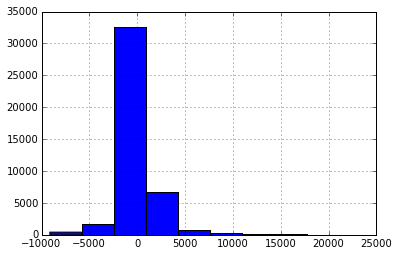

In [5]:
import numpy as np
import pandas
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt

"""
In this question, you need to:
1) implement the linear_regression() procedure
2) Select features (in the predictions procedure) and make predictions.

"""

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    intercept = results.params[0]
    params = results.params[1:]
    
    return intercept, params


def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
    
    features = dataframe[['rain', 'precipi', 'hour', 'meantempi']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix = 'unit')
    features = features.join(dummy_units)
    values = dataframe['ENTRIESn_hourly']
    
    features_array = features.values
    values_array = values.values
    
    intercept, params = linear_regression(features_array, values_array)
    
    predictions = intercept + np.dot(features_array, params)
    
    return predictions


def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
       
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist()
    
    return plt


def run():
    %matplotlib inline
    path = 'data/turnstile_weather_v2.csv'
    turnstile_weather = pandas.read_csv(path)

    predict = predictions(turnstile_weather)
    
    plt = plot_residuals(turnstile_weather, predict)

    return plt

run()